<a href="https://colab.research.google.com/github/yunyeong-choi/2022fin/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C%20%EB%B0%B0%EC%9A%B0%EB%8A%94%20%EC%8B%A4%EC%A0%84%20%EA%B8%88%EC%9C%B5%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D(%ED%80%80%ED%8A%B8)/8%EA%B0%95_MACD_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20221003

In [1]:
# COLAB 환경을 위한 나눔고딕 한글폰트 설치  --> 진행 후,  런타임 > 런타임 다시 시작을 해 주세요. 다시 시작 후에는 이 부분 실행 X
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,868 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# 필요한 라이브러리 import



In [1]:
# matplotlib 임포트,  주피터 출력설정,  한글 글꼴 지정
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumBarunGothic'  # (Colab 용) 한글 출력을 위한 글꼴 설정

In [2]:
import pandas as pd
import numpy as np

# 삼성전자 주가의 MACD 구해보기

#### 예제 주식 데이터 csv 파일 다운로드

In [3]:
!wget "https://gist.githubusercontent.com/solaris33/e9938d2f36969a28b5cf15dfc17a77b3/raw/402e4494a6a0cce7d1d1d543cb5d9ac7831c6d1b/stock.adj_close.csv" -O "stock.adj_close.csv"

--2022-10-03 07:47:16--  https://gist.githubusercontent.com/solaris33/e9938d2f36969a28b5cf15dfc17a77b3/raw/402e4494a6a0cce7d1d1d543cb5d9ac7831c6d1b/stock.adj_close.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9051250 (8.6M) [text/plain]
Saving to: ‘stock.adj_close.csv’

stock.adj_close.csv 100%[===================>]   8.63M  --.-KB/s    in 0.06s   

2022-10-03 07:47:17 (153 MB/s) - ‘stock.adj_close.csv’ saved [9051250/9051250]



In [4]:
# 주가 데이터를 불러오고, series 하나를 고릅니다.
주가_데이터 = pd.read_csv('stock.adj_close.csv', index_col=0)
my_series = 주가_데이터.loc['A005930'][:]

In [5]:
my_series    # Series

2018-06-01    51300.0
2018-06-04    51100.0
2018-06-05    51300.0
2018-06-07    50600.0
2018-06-08    49650.0
               ...   
2020-09-14    60400.0
2020-09-15    61000.0
2020-09-16    61000.0
2020-09-17    59500.0
2020-09-18    59300.0
Name: A005930, Length: 568, dtype: float64

In [6]:
my_series.index    # Series의 인덱스 보기

Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08',
       '2018-06-11', '2018-06-12', '2018-06-14', '2018-06-15', '2018-06-18',
       ...
       '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
       '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18'],
      dtype='object', length=568)

In [7]:
my_series.name    # Series의 이름 보기

'A005930'

In [8]:
type(my_series)    # 타입 확인하기

pandas.core.series.Series

In [9]:
# 불러온 주가 데이터에서 불러오고, dataframe 하나를 추출합니다.
my_df = 주가_데이터.T

In [10]:
my_df

Symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,NaN,7690.0,4970.0,6530.0,38600.0,13850.0,NaN,NaN,NaN
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,NaN,7700.0,4900.0,6870.0,36400.0,14250.0,NaN,NaN,NaN
2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,9390.0,...,3240.0,NaN,7690.0,4940.0,6690.0,36350.0,14450.0,NaN,NaN,NaN
2018-06-07,11650.0,16500.0,3069.0,13800.0,20050.0,124500.0,21000.0,41498.0,154000.0,9490.0,...,3245.0,NaN,7680.0,5140.0,6950.0,38700.0,14300.0,NaN,NaN,NaN
2018-06-08,11500.0,16600.0,3045.0,13800.0,20400.0,123500.0,20750.0,41956.0,154000.0,9510.0,...,3180.0,NaN,7680.0,5280.0,6740.0,40200.0,14150.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,26300.0,14800.0,860.0,11300.0,13000.0,67500.0,37300.0,65700.0,158000.0,17000.0,...,1760.0,1395.0,6960.0,28900.0,4135.0,9540.0,4195.0,13900.0,30050.0,17450.0
2020-09-15,25400.0,14800.0,833.0,11300.0,13200.0,66200.0,38500.0,68700.0,162500.0,17250.0,...,1780.0,1395.0,7010.0,29800.0,4185.0,9540.0,4070.0,13250.0,31450.0,15800.0
2020-09-16,25050.0,14800.0,817.0,11050.0,13150.0,65400.0,37950.0,68400.0,177500.0,17200.0,...,1745.0,1385.0,6990.0,31900.0,4200.0,9540.0,4045.0,13350.0,31750.0,15100.0
2020-09-17,25300.0,14800.0,812.0,10900.0,13150.0,64500.0,37150.0,66400.0,179500.0,17200.0,...,1710.0,1355.0,7030.0,30800.0,4155.0,8010.0,4015.0,13550.0,31200.0,14700.0


In [11]:
# 삼성전자 종목코드 : A005930
# 삼성전자 종목 데이터 가져오기
삼성전자_df = my_df.loc[:, 'A005930'].to_frame()
삼성전자_df.rename(columns = {'A005930' : 'adj_close'}, inplace = True)
삼성전자_df

,adj_close
2018-06-01,51300.0
2018-06-04,51100.0
2018-06-05,51300.0
2018-06-07,50600.0
2018-06-08,49650.0
...,...
2020-09-14,60400.0
2020-09-15,61000.0
2020-09-16,61000.0
2020-09-17,59500.0


In [12]:
type(삼성전자_df)

pandas.core.frame.DataFrame

In [14]:
# 12일, 26일에 대한 지수이동평균을 구합니다.
short = 12 
long = 26
삼성전자_df["ema_short"] = 삼성전자_df["adj_close"].ewm(short).mean()   # 12일간의 지수 이동평균
삼성전자_df["ema_long"] = 삼성전자_df["adj_close"].ewm(long).mean()     # 26일간의

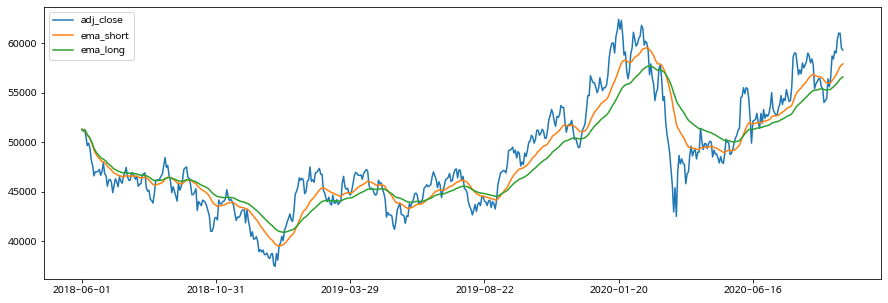

In [15]:
# "adj_close", "ema_short", "ema_long" 을 시각화 합니다.
삼성전자_df[["adj_close", "ema_short", "ema_long"]].plot(figsize=(15,5))

- MACD

In [16]:
# MACD = 단기 지수이동평균 - 장기 지수이동평균
삼성전자_df["MACD"] = 삼성전자_df["ema_short"] - 삼성전자_df["ema_long"]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


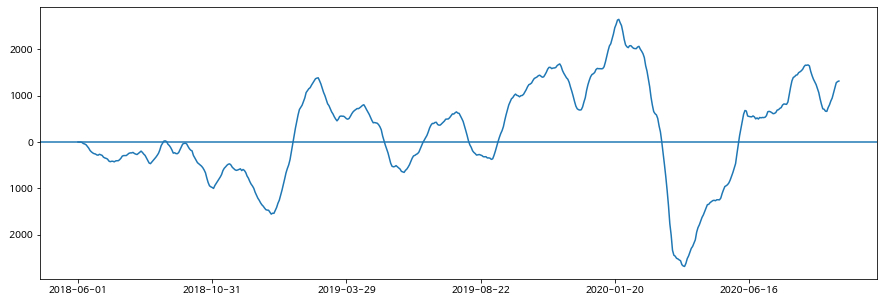

In [17]:
# MACD 값 시각화
삼성전자_df["MACD"].plot(figsize=(15, 5))
plt.axhline(0)

- MACD 시그널

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


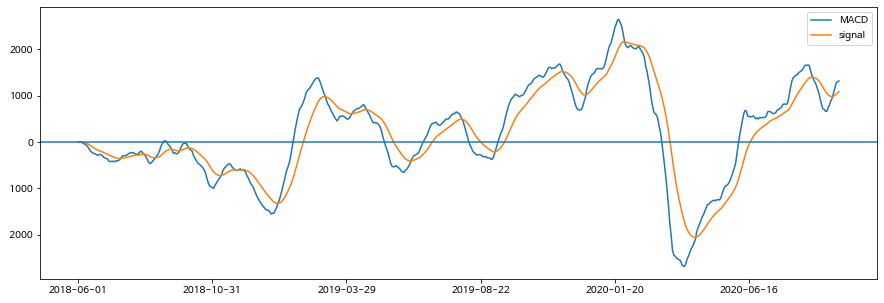

In [18]:
# MACD의 9일 이동평균값을 구합니다.
삼성전자_df["signal"] = 삼성전자_df["MACD"].ewm(9).mean()
삼성전자_df[["MACD", "signal"]].plot(figsize=(15, 5))
plt.axhline(0)

# MACD oscillator 값 구하기

<BarContainer object of 568 artists>

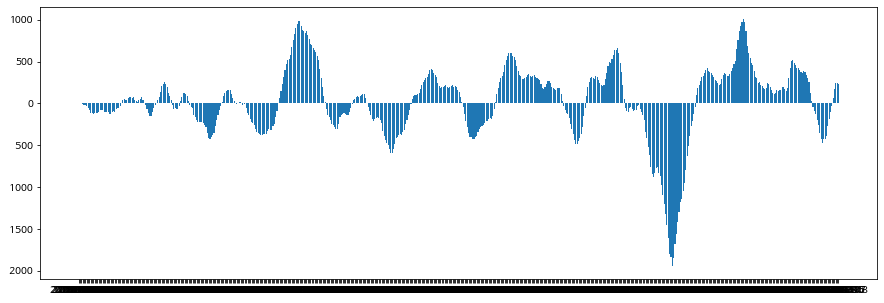

In [19]:
삼성전자_df["macdhist"] = 삼성전자_df["MACD"] - 삼성전자_df["signal"]
plt.figure(figsize=(15, 5))
plt.bar(삼성전자_df.index, 삼성전자_df.macdhist)

# 다양한 종목들의 MACD 그려보기

In [20]:
def make_macd(df, short=12, long=26, t=9):
    ema_short = df['adj_close'].ewm(short).mean()
    ema_long = df['adj_close'].ewm(long).mean()
    MACD = ema_short - ema_long
    signal = MACD.ewm(t).mean()
    macdhist = MACD - signal
    
    df['ema_short'] = ema_short
    df['ema_long'] = ema_long
    df['MACD'] = MACD
    df['signal'] = signal
    df['macdhist'] = macdhist

    return df

In [21]:
def plot_macd(df):
  fig, axes  = plt.subplots(nrows=2, ncols=1)
  df[["adj_close", "ema_short", "ema_long"]].plot(figsize=(20, 10), ax=axes[0])
  df["MACD"].plot(figsize=(20, 10), ax=axes[1])
  plt.axhline(0)

In [22]:
def extract_df(df, code):
  extracted_df = df.loc[:, code].to_frame()
  extracted_df.rename(columns = {code : 'adj_close'}, inplace = True)

  return extracted_df

In [23]:
temp_df = extract_df(my_df, 'A000020')
temp_df

,adj_close
2018-06-01,11550.0
2018-06-04,11750.0
2018-06-05,11700.0
2018-06-07,11650.0
2018-06-08,11500.0
...,...
2020-09-14,26300.0
2020-09-15,25400.0
2020-09-16,25050.0
2020-09-17,25300.0


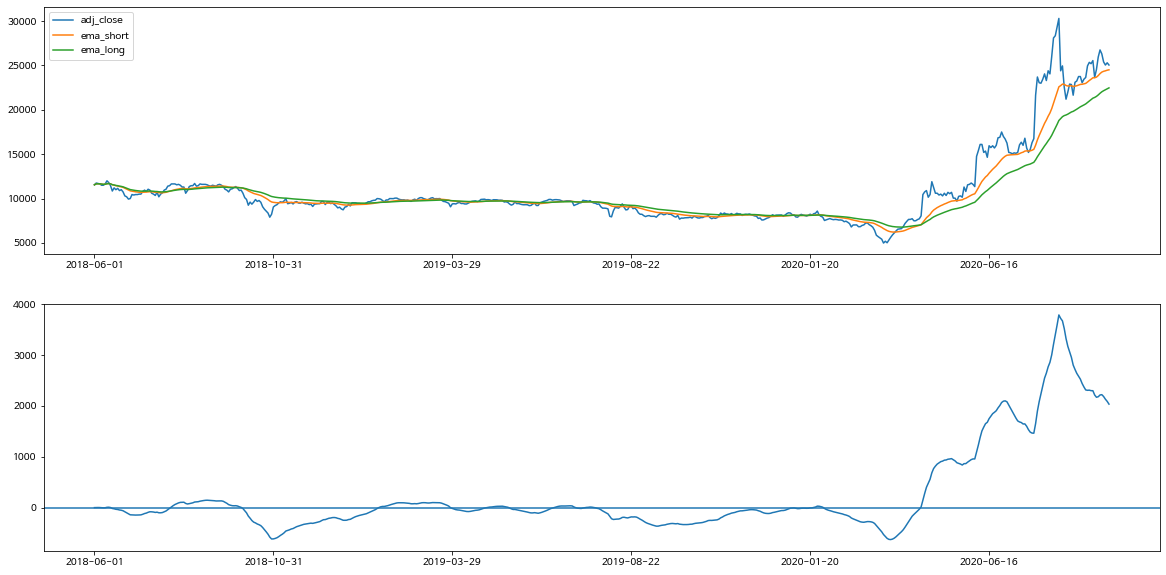

In [24]:
# A000020 : 동화약품
df = make_macd(extract_df(my_df, 'A000020'))
plot_macd(df)

<BarContainer object of 568 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


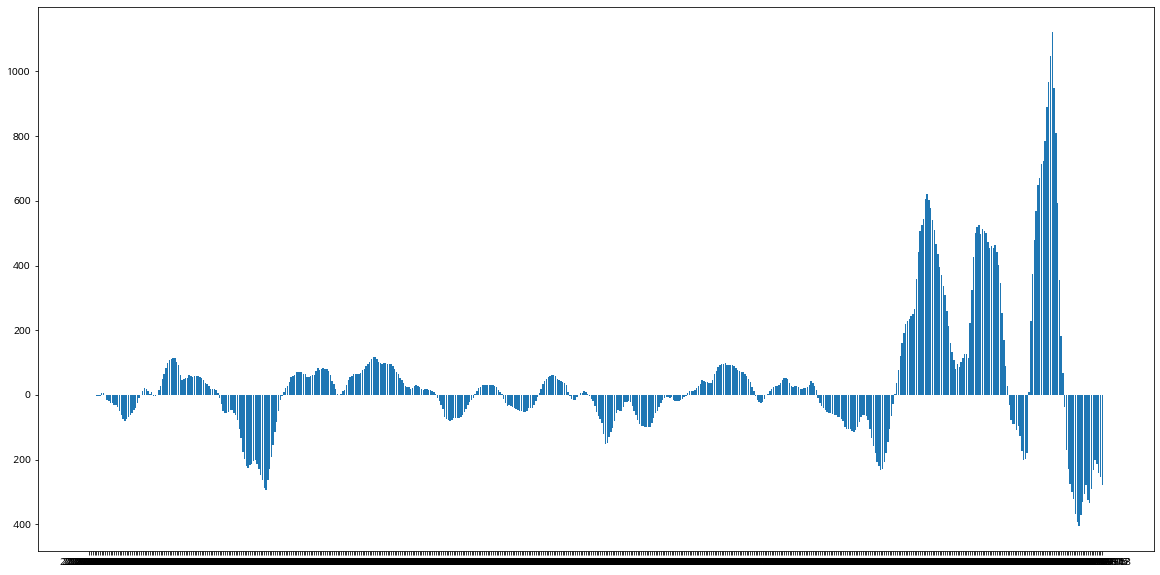

In [25]:
# macd oscillator를 그립니다.
plt.figure(figsize=(20,10))
plt.bar(df.index, df.macdhist)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


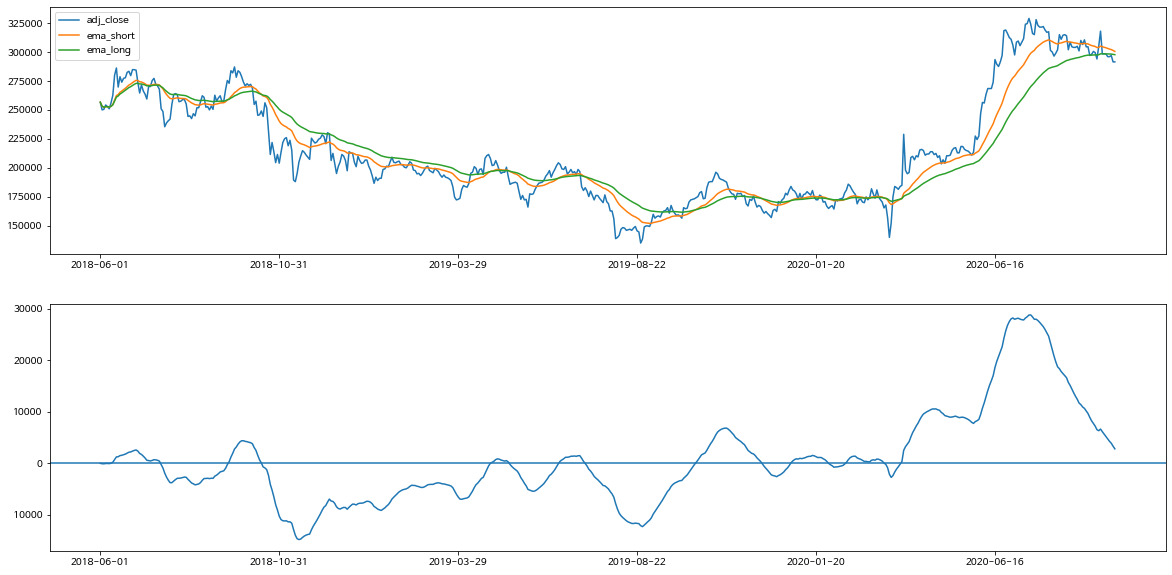

In [26]:
# A068270 : 셀트리온
df = make_macd(extract_df(my_df, 'A068270'))
plot_macd(df)

<BarContainer object of 568 artists>

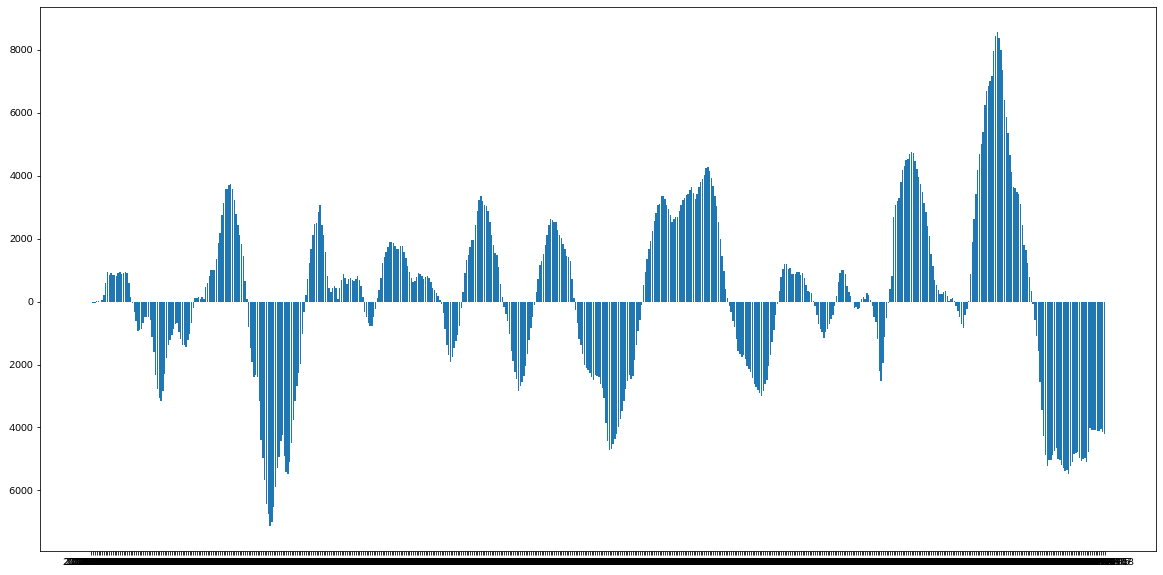

In [27]:
# macd oscillator를 그립니다.
plt.figure(figsize=(20,10))
plt.bar(df.index, df.macdhist)

In [28]:
df.index

Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08',
       '2018-06-11', '2018-06-12', '2018-06-14', '2018-06-15', '2018-06-18',
       ...
       '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
       '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18'],
      dtype='object', length=568)

In [29]:
df.macdhist

2018-06-01       0.000000
2018-06-04     -32.877617
2018-06-05     -29.890367
2018-06-07      18.278639
2018-06-08      19.192495
                 ...     
2020-09-14   -4110.350147
2020-09-15   -4112.073063
2020-09-16   -4042.834238
2020-09-17   -4149.954403
2020-09-18   -4198.078650
Name: macdhist, Length: 568, dtype: float64

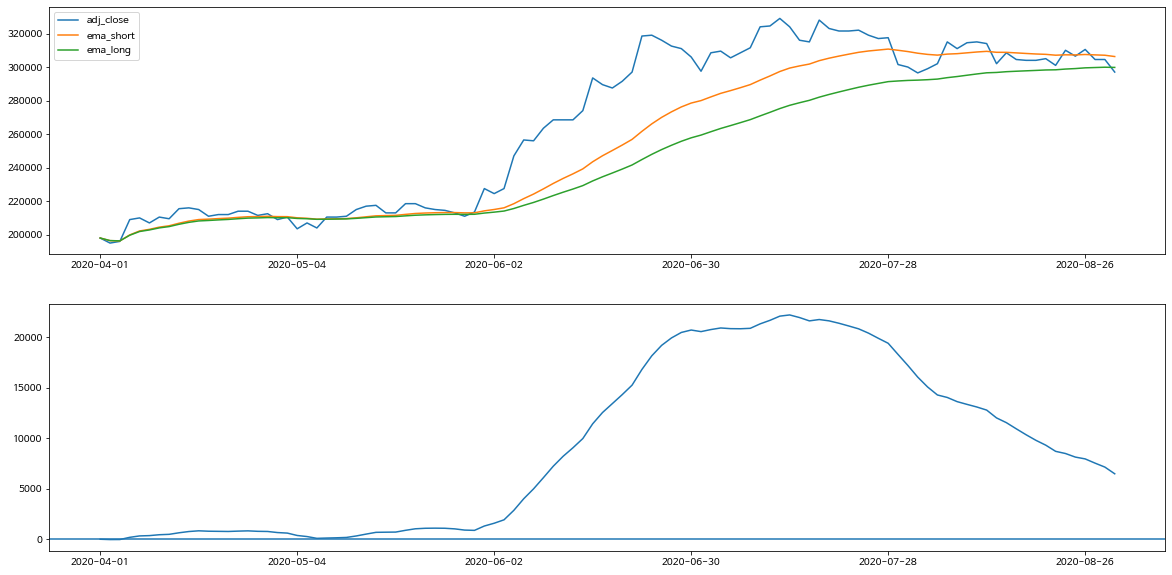

In [30]:
# A068270 : 셀트리온
# 2020-04-01부터 2020-08-31까지 날짜의 macd 그리기
df = make_macd(extract_df(my_df.loc['2020-04-01':'2020-08-31',:], 'A068270'))
plot_macd(df)

# MACD oscillator 상향 돌파 전략 구현해보기

# 데이터 준비

In [31]:
!wget "https://drive.google.com/uc?export=download&id=1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1" -O "stock_data.zip"

--2022-10-03 08:05:23--  https://drive.google.com/uc?export=download&id=1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1
Resolving drive.google.com (drive.google.com)... 74.125.195.113, 74.125.195.102, 74.125.195.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6k7dkda2g7ofnmnvb0s6fgtbsfout906/1664784300000/03135380322884973343/*/1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1?e=download&uuid=9bd25945-5af2-4986-a47c-f175b7e801c5 [following]
--2022-10-03 08:05:30--  https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6k7dkda2g7ofnmnvb0s6fgtbsfout906/1664784300000/03135380322884973343/*/1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1?e=download&uuid=9bd25945-5af2-4986-a47c-f175b7e801c5
Resolving doc-00-4g-docs.googleusercontent.com (doc-00-4g-docs.googleusercontent.com)... 74.125.142.132, 2607:

In [32]:
!unzip stock_data.zip

Archive:  stock_data.zip
replace stock.adj_close.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
d = {}

for data_name in ['adj_close']:
    print(f"read csv {data_name} ...")
    d[data_name] = pd.read_csv(f"stock.{data_name}.csv", index_col=0, encoding='cp949', parse_dates=True)
    print(f"done!  {d[data_name].shape}")

read csv adj_close ...
done!  (2278, 582)


In [ ]:
d

{'adj_close':          2018-06-01  2018-06-04  2018-06-05  ...  2020-10-12  2020-10-13  2020-10-14
 Symbol                                       ...                                    
 A000020     11550.0     11750.0     11700.0  ...     24000.0     24300.0     23850.0
 A000030     15500.0     15950.0     16050.0  ...     14800.0     14800.0     14800.0
 A000040      2992.0      3021.0      3025.0  ...       863.0       850.0       874.0
 A000050     13200.0     13550.0     13600.0  ...     11000.0     10850.0     10800.0
 A000060     20050.0     20050.0     20150.0  ...     13950.0     13700.0     13550.0
 ...             ...         ...         ...  ...         ...         ...         ...
 A950160     38600.0     36400.0     36350.0  ...      8010.0      8010.0      8010.0
 A950170     13850.0     14250.0     14450.0  ...      4445.0      4440.0      4335.0
 A950180         NaN         NaN         NaN  ...     12900.0     12650.0     13350.0
 A950190         NaN         NaN         

In [ ]:
itemname = pd.read_csv("stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("stockinfo.sector.csv", index_col=0, encoding='cp949')

In [ ]:
stock_info = pd.concat([itemname, sector], axis=1)

In [ ]:
stock_info

,itemname,Sector
Symbol,,
A000020,동화약품,제약_및_바이오
A000030,우리은행,NaN
A000040,KR모터스,자동차_및_부품
A000050,경방,내구_소비재_및_의류
A000060,메리츠화재,보험
...,...,...
A950160,코오롱티슈진,NaN
A950170,JTC,NaN
A950180,SNK,NaN


# MACD oscillator 구현하기

In [ ]:
short = 12 
long = 26
t = 9
d['ema_short'] = d['adj_close'].ewm(short, axis=1).mean()
d['ema_long'] = d['adj_close'].ewm(long, axis=1).mean()
d['MACD'] = d['ema_short'] - d['ema_long']
d['signal'] = d['MACD'].ewm(t).mean()
d['macdhist'] = d['MACD'] - d['signal']

In [ ]:
d['ema_short']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,2018-06-19,2018-06-20,2018-06-21,2018-06-22,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-07-02,2018-07-03,2018-07-04,2018-07-05,2018-07-06,2018-07-09,2018-07-10,2018-07-11,2018-07-12,2018-07-13,2018-07-16,2018-07-17,2018-07-18,2018-07-19,2018-07-20,2018-07-23,2018-07-24,2018-07-25,2018-07-26,2018-07-27,2018-07-30,...,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11654.00,11670.575693,11664.798722,11626.363495,11600.876075,11609.685168,11673.176390,11692.177171,11658.359295,11552.140948,11508.260143,11447.807963,11413.815105,11357.271022,11319.214820,11260.325440,11163.540939,11068.695379,10959.932574,10869.195792,10830.257041,10790.918897,10760.194583,10732.603383,10712.159604,10693.714954,10702.863504,10723.942997,10730.376415,10757.206729,10773.277641,10758.925874,10737.606102,10705.862820,10705.385056,10664.388226,10651.108787,10651.019562,10674.993625,...,22871.519439,22742.941021,22685.791712,22702.269272,22713.633174,22631.815238,22667.829450,22712.611800,22792.410893,22866.071593,22880.219932,22924.049168,22979.891540,23131.438344,23302.096933,23448.089477,23609.774902,23612.869140,23684.956129,23859.190273,24081.560252,24252.209464,24340.501043,24395.077886,24464.687279,24509.711335,24551.272001,24512.712617,24407.888569,24153.435602,23995.479018,23841.980632,23688.751352,23720.385864,23722.663874,23705.535884,23739.725431,23759.746552,23801.304509,23805.050316
A000030,15500.0,15734.00,15847.867804,16030.964856,16163.678232,16261.768962,16367.252841,16388.846382,16345.571262,16346.189696,16346.690370,16347.102787,16347.447380,16347.738745,16347.987591,16364.179822,16336.848514,16287.782448,16288.985075,16294.864566,16309.528607,16317.932420,16311.721399,16351.219971,16408.927682,16425.721248,16449.566388,16453.907492,16496.221674,16509.229289,16508.454550,16499.413967,16491.179979,16491.906213,16500.758632,16500.696810,16520.920283,16535.386514,16560.703623,16579.891856,...,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000
A000040,2992.0,3007.08,3013.537313,3029.109393,3032.815484,3022.969438,3014.546696,3017.548434,3019.863396,3019.463548,3019.139838,3015.757903,3002.822298,2983.552321,2954.989230,2917.921716,2879.857560,2836.333650,2798.108266,2753.867894,2715.409065,2676.636281,2643.114945,2613.814915,2611.340833,2609.465163,2606.729657,2603.568129,2599.681398,2596.832397,2593.572671,2586.856273,2577.426096,2565.781172,2553.842318,2541.224140,2528.064519,2516.992316,2507.175532,2496.897641,...,724.989742,723.528993,720.795993,718.427071,714.778834,711.411232,708.918060,708.616671,708.184619,705.478110,703.979794,704.058271,706.438404,723.096989,736.243374,752.686191,770.171869,782.620187,779.418634,786.771047,790.865582,796.183614,799.015643,800.399056,801.291436,800.884402,798.893294,793.516887,787.169434,786.387170,785.203542,781.957115,780.806568,784.513755,786.474236,792.130064,797.581597,802.613782,806.258876,811.469731
A000050,13200.0,13

In [ ]:
d['macdhist']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,2018-06-19,2018-06-20,2018-06-21,2018-06-22,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-07-02,2018-07-03,2018-07-04,2018-07-05,2018-07-06,2018-07-09,2018-07-10,2018-07-11,2018-07-12,2018-07-13,2018-07-16,2018-07-17,2018-07-18,2018-07-19,2018-07-20,2018-07-23,2018-07-24,2018-07-25,2018-07-26,2018-07-27,2018-07-30,...,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A000020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000030,0.0,1.251241,2.653818,7.191369,11.847883,15.173765,17.808346,12.770567,6.951023,8.681404,16.348256,18.544758,22.444795,23.820405,27.736069,31.455690,32.643056,35.946696,45.395347,57.137816,67.454745,69.599472,69.893124,75.866194,84.123105,84.888367,86.646063,80.951879,79.938634,76.671805,67.843955,59.903191,57.866273,58.845802,63.239928,60.164020,68.607363,70.502819,71.959653,67.615564,...,-1668.777888,-1575.390636,-1503.006162,-1451.386387,-1400.422470,-1328.459337,-1288.102735,-1251.394400,-1224.646237,-1197.381070,-1156.508654,-1124.440076,-1096.509817,-1093.120364,-1094.550570,-1089.869477,-1089.216151,-1049.634800,-1028.465013,-1033.168068,-1049.519771,-1052.562510,-1035.264365,-1010.326079,-990.003638,-964.395377,-938.884912,-894.640671,-835.759574,-742.308296,-676.019042,-613.279942,-552.930608,-540.221577,-520.772881,-497.278122,-487.257847,-474.128728,-466.775622,-450.407659
A000040,0.0,-2.017333,-2.860521,-4.988678,-6.229511,-8.015082,-11.481021,-12.913001,-9.814569,-7.150046,-1.024332,1.074478,2.900209,2.199582,1.744261,-2.449642,-1.608958,3.034276,3.828880,4.286462,3.423456,-1.379553,-3.504335,-10.241799,-13.591869,-12.998563,-13.622644,-14.950333,-22.038692,-23.679633,-25.944722,-26.786148,-24.993573,-24.172547,-23.328871,-25.194129,-25.042027,-26.937810,-31.511902,-38.164816,...,-1057.257444,-998.650411,-953.700462,-921.707013,-890.524553,-845.963715,-821.028988,-797.659554,-780.625355,-764.014879,-738.400987,-717.819848,-699.109726,-691.253321,-687.799002,-679.571300,-673.739229,-645.192593,-633.516219,-634.650146,-644.268166,-645.113890,-633.977756,-618.502873,-606.091559,-590.754796,-575.967582,-550.418527,-515.863643,-457.578010,-416.537584,-378.383025,-340.997567,-332.057864,-319.471037,-303.133762,-295.421684,-285.936598,-280.594456,-269.077695
A000050,0.0,0.974724,1.580954,2.428858,3.153532,3.670479,0.371610,0.784895,13.765105,24.783229,31.321888,33.989842,35.832484,27.547270,26.938431,27.441522,38.112548,50.665718,52.399763,54.643606,50.569437,49.803796,50.154202,46.637713,40.794078,34.914700,42.464252,40.157090,31.927408,24.462062,18.460164,14.874376,6.644131,-3.678478,-13.456125,-26.805309,-45.849731,-64.247821,-76.730136,-87.903002,...,-696.695493,-651.236901,-642.423535,-643.218376,-628.741740,-615.251426,-615.264909,-612.2348

In [ ]:
# 시뮬레이션을 위한 날짜 변수와 날짜 인덱스 변수 만들기
date_list = d['adj_close'].columns
date_i = np.arange(len(date_list))

In [ ]:
# 날짜 변수 확인하기 (앞부분)
date_list[:5], date_i[:5]

(Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08'], dtype='object'),
 array([0, 1, 2, 3, 4]))

In [ ]:
# 시뮬레이션 할 종목 선택하기
code = 'A060250'   # 'A060250' NHN한국사이버결제,   'A068270' 셀트리온
code_name = stock_info.loc[code, 'itemname']
code, code_name

('A060250', 'NHN한국사이버결제')

In [ ]:
print("MACD oscillator 상향 돌파 Signal")

보유일 = 20

#--------------------------------------------------------------------------------------------start
signal_i_list = []
signal_date_list = []
signal_price_list = []
signal_return_list = []
#--------------------------------------------------------------------------------------------end


for i in date_i:
    if i < 1 or i > len(date_list) - 보유일:
        continue
    
    
    prev_date = date_list[i-1]
    now_date = date_list[i]
    
    직전_주가 = d['adj_close'].loc[code, prev_date]
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    직전_MACD_oscillator = d['macdhist'].loc[code, prev_date]
    당일_MACD_oscillator = d['macdhist'].loc[code, now_date]
    
    
    if 직전_MACD_oscillator < 0 and 당일_MACD_oscillator >= 0:
        
        sell_date = date_list[i+보유일]
        매도시_주가 = d['adj_close'].loc[code, sell_date]
        수익률 = (매도시_주가 / 당일_주가)*100 - 100
        
        print(f"  - {now_date}  Signal 발생!  매수주가 {당일_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        
        #--------------------------------------------------------------------------------------------start
        signal_i_list.append(i)
        signal_date_list.append(now_date)
        signal_price_list.append(당일_주가)
        signal_return_list.append(수익률)
        #--------------------------------------------------------------------------------------------end

MACD oscillator 상향 돌파 Signal
  - 2018-07-10  Signal 발생!  매수주가 13615  ->  매도주가 14093  , 수익률 3.511 %
  - 2018-11-23  Signal 발생!  매수주가 11370  ->  매도주가 13150  , 수익률 15.655 %
  - 2019-04-15  Signal 발생!  매수주가 14150  ->  매도주가 15750  , 수익률 11.307 %
  - 2019-12-17  Signal 발생!  매수주가 21850  ->  매도주가 28600  , 수익률 30.892 %


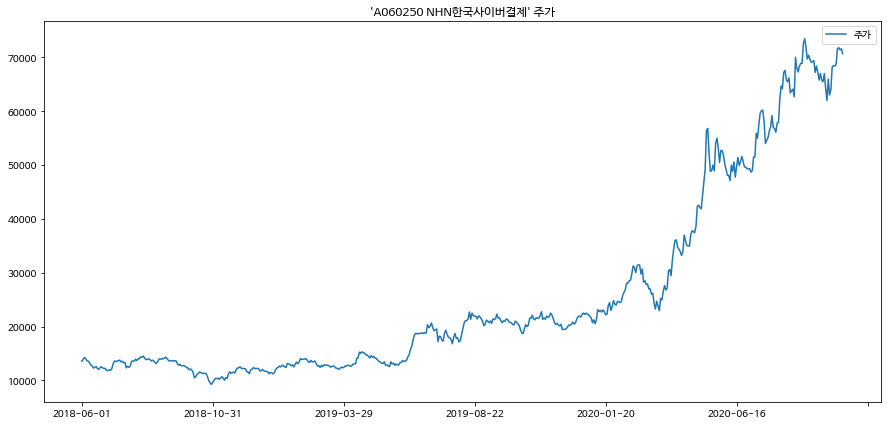

In [ ]:
d['adj_close'].loc[code, :].plot(figsize=(15,7), label='주가');
plt.title(f"'{code} {code_name}' 주가")
plt.legend();

In [ ]:
dummy_price_lsit = []
for i in range(len(signal_price_list)):
     dummy_price_lsit.append(0)

Text(0.5, 1.0, "'A060250 NHN한국사이버결제' MACD oscillator 상향돌파 전략")

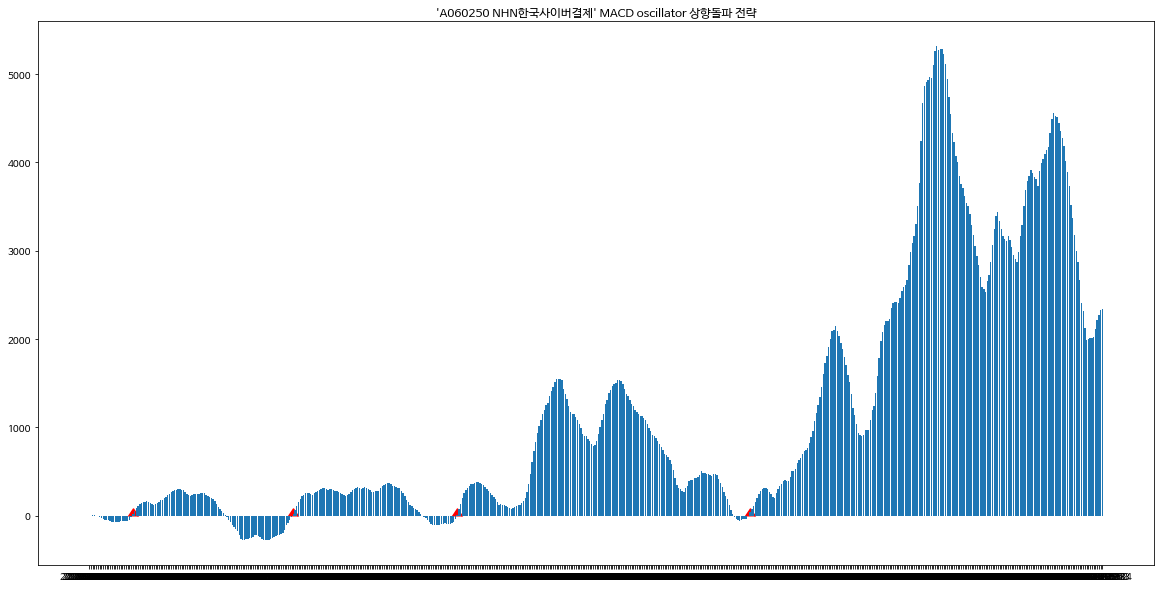

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(d['adj_close'].columns, d['macdhist'].loc[code, :])
plt.scatter(x=signal_i_list, y=dummy_price_lsit, marker=10, color='red', s=100 , label='돌파 signal');
plt.title(f"'{code} {code_name}' MACD oscillator 상향돌파 전략")

In [ ]:
수익률_합 = sum(signal_return_list)
평균_수익률 = 수익률_합 / len(signal_return_list)

단순_기간_수익률 = (d['adj_close'].loc[code][-1] / d['adj_close'].loc[code][0]) * 100 - 100

print(f"전체 매매 수익률 합  {수익률_합:.2f}%,  매매 당 평균 수익률  {평균_수익률:.2f}%,  "
      f"단순 기간 수익률 {단순_기간_수익률:.2f}%")

전체 매매 수익률 합  61.37%,  매매 당 평균 수익률  15.34%,  단순 기간 수익률 421.08%


##### <연습문제 3-6>
**이동평균선 돌파 시뮬레이션** 분석을 종목 '셀트리온'에 대해 수행하고, 결과를 출력해보세요

- 보유일수 바꿔가면서 비교분석해보기

In [ ]:
# 시뮬레이션 할 종목 선택하기
code = 'A068270'   # 'A060250' NHN한국사이버결제,   'A068270' 셀트리온
code_name = stock_info.loc[code, 'itemname']
code, code_name

('A068270', '셀트리온')

In [ ]:
print("MACD oscillator 상향 돌파 Signal")

보유일 = 20

#--------------------------------------------------------------------------------------------start
signal_i_list = []
signal_date_list = []
signal_price_list = []
signal_return_list = []
#--------------------------------------------------------------------------------------------end


for i in date_i:
    if i < 1 or i > len(date_list) - 보유일:
        continue
    
    
    prev_date = date_list[i-1]
    now_date = date_list[i]
    
    직전_주가 = d['adj_close'].loc[code, prev_date]
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    직전_MACD_oscillator = d['macdhist'].loc[code, prev_date]
    당일_MACD_oscillator = d['macdhist'].loc[code, now_date]
    
    
    if 직전_MACD_oscillator < 0 and 당일_MACD_oscillator >= 0:
        
        sell_date = date_list[i+보유일]
        매도시_주가 = d['adj_close'].loc[code, sell_date]
        수익률 = (매도시_주가 / 당일_주가)*100 - 100
        
        print(f"  - {now_date}  Signal 발생!  매수주가 {당일_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        
        #--------------------------------------------------------------------------------------------start
        signal_i_list.append(i)
        signal_date_list.append(now_date)
        signal_price_list.append(당일_주가)
        signal_return_list.append(수익률)
        #--------------------------------------------------------------------------------------------end

MACD oscillator 상향 돌파 Signal
  - 2018-06-12  Signal 발생!  매수주가 256180  ->  매도주가 259464  , 수익률 1.282 %
  - 2018-09-14  Signal 발생!  매수주가 273071  ->  매도주가 256180  , 수익률 -6.186 %
  - 2019-04-26  Signal 발생!  매수주가 202491  ->  매도주가 177657  , 수익률 -12.264 %
  - 2019-06-21  Signal 발생!  매수주가 202968  ->  매도주가 176224  , 수익률 -13.176 %
  - 2019-10-14  Signal 발생!  매수주가 174314  ->  매도주가 177657  , 수익률 1.918 %
  - 2019-12-27  Signal 발생!  매수주가 184000  ->  매도주가 167000  , 수익률 -9.239 %
  - 2020-02-14  Signal 발생!  매수주가 181000  ->  매도주가 170500  , 수익률 -5.801 %
  - 2020-03-26  Signal 발생!  매수주가 181500  ->  매도주가 211500  , 수익률 16.529 %


In [ ]:
dummy_price_lsit = []
for i in range(len(signal_price_list)):
     dummy_price_lsit.append(0)

Text(0.5, 1.0, "'A068270 셀트리온' MACD oscillator 상향돌파 전략")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


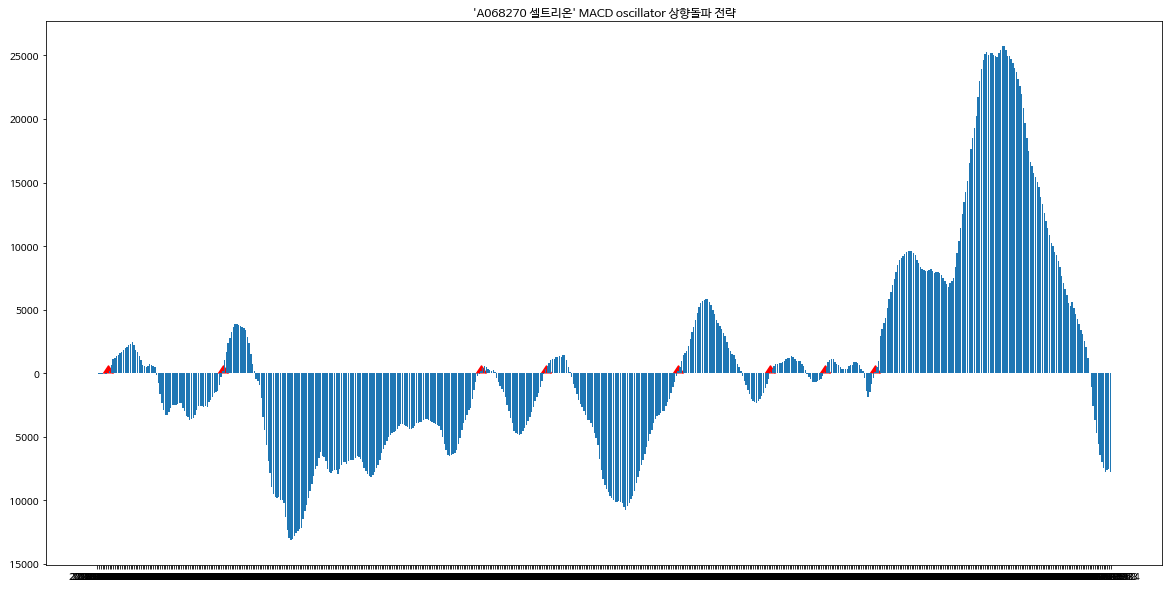

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(d['adj_close'].columns, d['macdhist'].loc[code, :])
plt.scatter(x=signal_i_list, y=dummy_price_lsit, marker=10, color='red', s=100 , label='돌파 signal');
plt.title(f"'{code} {code_name}' MACD oscillator 상향돌파 전략")

In [ ]:
수익률_합 = sum(signal_return_list)
평균_수익률 = 수익률_합 / len(signal_return_list)

단순_기간_수익률 = (d['adj_close'].loc[code][-1] / d['adj_close'].loc[code][0]) * 100 - 100

print(f"전체 매매 수익률 합  {수익률_합:.2f}%,  매매 당 평균 수익률  {평균_수익률:.2f}%,  "
      f"단순 기간 수익률 {단순_기간_수익률:.2f}%")

전체 매매 수익률 합  -26.94%,  매매 당 평균 수익률  -3.37%,  단순 기간 수익률 2.08%
